TensorFlow Keras



In [1]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
keras = tf.keras

In [3]:
X, y = make_classification(
    n_samples=5000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=3,
    weights=[1/3]*3, # hacemos 3 clases balanceadas
    random_state=42

)

df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1,21)])
df['class'] = y
df.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,class
0,0.577910,-1.175159,3.182231,0.404955,-0.613865,-1.039464,-0.239075,-2.836809,-8.026848,-9.041112,...,-3.014423,-0.923978,1.094650,0.711980,1.824328,2.145572,0.051517,-3.797374,1.102314,0
1,-3.256100,0.919359,1.291473,0.030575,1.660010,-0.552647,0.659944,-1.471791,0.089973,-0.870679,...,-3.269361,0.624425,0.528576,-2.705067,0.700740,-2.075426,-1.278485,0.824840,-0.712165,1
2,0.263308,-1.464582,1.580419,0.452207,0.693424,-0.664855,-2.134743,-3.664896,-3.941314,-4.077946,...,-2.652247,0.734020,-0.504239,-1.229404,1.276939,0.018643,-1.459663,-2.030924,-2.562835,0
3,2.327166,2.972473,2.546896,-0.887235,0.763177,2.039143,-1.942751,-0.079054,4.994518,-3.459207,...,-4.096714,2.801948,-0.499836,0.922420,0.170235,2.051526,1.737861,1.805639,2.357027,0
4,0.047870,0.033218,-1.179213,0.779208,1.454919,2.839628,1.145734,2.988370,6.476426,8.485573,...,1.315190,0.065581,1.876118,-0.038665,-2.712738,0.374466,-0.720040,0.809654,-2.902803,1


In [4]:

X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
# aplicar one hot encoder a las salidas y para poder calculas métricas como 
# precision, recall, auc  de keras esperan valores en el formato one-hot
# garantiza que las métricas funcionen correctamente sin ajustes extra en las métricas
y_train_encoded = keras.utils.to_categorical(y_train, num_classes=3)
y_test_encoded = keras.utils.to_categorical(y_test, num_classes=3)
y_train_encoded[:5]


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [6]:
# 0. random state
keras.backend.clear_session()
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# 1. Arquitectura
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'), # ponemos tantas neuronas como clases tengamos
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax'), # capa de salida para clasificacion multiclase, mismo número de neuronas que de clases a predecir
])
''' Panchi:
     keras.layers.Dense(128, input_shape=(20,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(3, activation='softmax')'''
# 2. Compile
model.compile(
    #loss=keras.losses.SparseCategoricalCrossentropy(), # si la "y" no está codificada a one-hot y es enteros 0, 1, 2, 3...
    loss=keras.losses.CategoricalCrossentropy(), # si la "y" ya está copdificada a one-hot [0, 0, 1]. En texto sería: "categorical crossentropy"
    optimizer=keras.optimizers.Adam(),   
    metrics=[
        'accuracy', # al escribirlo como teto, Keras seleccionará el accuracy más idoneo dependiendo de si es clasificacion binaria o multiclase
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        keras.metrics.AUC(),
        ] 
)

model.fit(X_train, y_train_encoded, validation_split=0.2, epochs=100, verbose=1, batch_size=32)
# model.fit(X_train, y_train_encoded, validation_data=[???????], epochs=100, verbose=1, batch_size=32) # aprovechas mejor los datos, pero gastas la oportunidad de validar aparte, 



Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5983 - auc: 0.7767 - loss: 0.8716 - precision: 0.6667 - recall: 0.4491 - val_accuracy: 0.8200 - val_auc: 0.9428 - val_loss: 0.4950 - val_precision: 0.8519 - val_recall: 0.7550
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8455 - auc: 0.9529 - loss: 0.4471 - precision: 0.8813 - recall: 0.8038 - val_accuracy: 0.8575 - val_auc: 0.9637 - val_loss: 0.3812 - val_precision: 0.8833 - val_recall: 0.8325
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8914 - auc: 0.9704 - loss: 0.3426 - precision: 0.9130 - recall: 0.8669 - val_accuracy: 0.8775 - val_auc: 0.9714 - val_loss: 0.3308 - val_precision: 0.8967 - val_recall: 0.8575
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9080 - auc: 0.9783 - loss: 0.2877 - precision: 0.9182 - recall: 0.8852 - val_accuracy: 0.8938 - val_auc: 0.9755 - val_loss: 0.3022 - val_precision: 0.9057 - val_recall: 0.8763
Epoch 5/100
100/100 ━━━━━━━

In [7]:
df_history = pd.DataFrame(model.history.history)
df_history.head()


,accuracy,auc,loss,precision,recall,val_accuracy,val_auc,val_loss,val_precision,val_recall
0,0.707812,0.871147,0.703277,0.778236,0.590000,0.82000,0.942835,0.495025,0.851904,0.75500
1,0.853750,0.958748,0.416992,0.885434,0.818750,0.85750,0.963670,0.381210,0.883289,0.83250
2,0.890312,0.973031,0.329265,0.910101,0.870000,0.87750,0.971435,0.330766,0.896732,0.85750
3,0.906875,0.979883,0.280330,0.918849,0.888125,0.89375,0.975482,0.302235,0.905685,0.87625
4,0.919062,0.983937,0.247392,0.929926,0.904063,0.90000,0.977638,0.284960,0.907928,0.88750


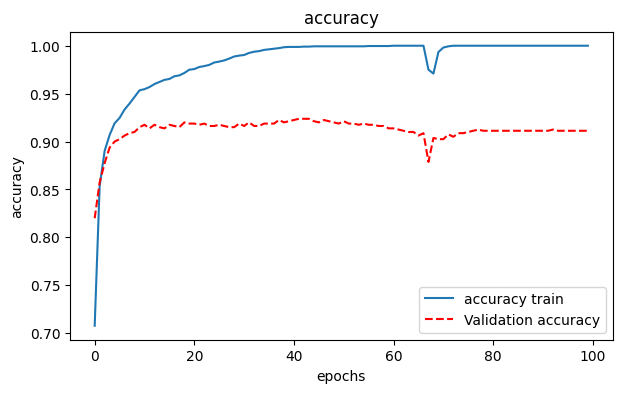

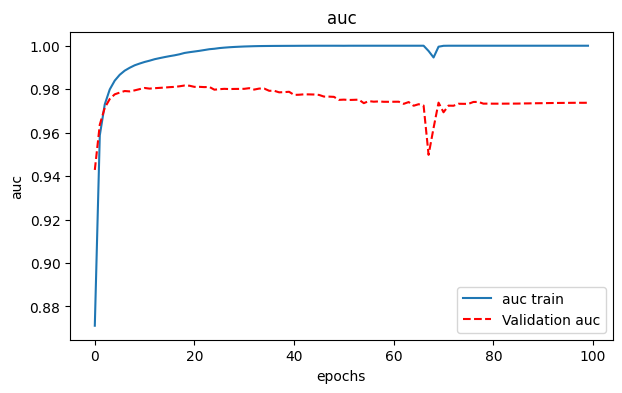

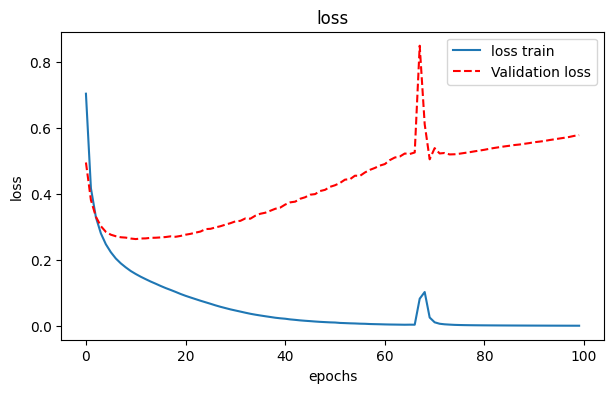

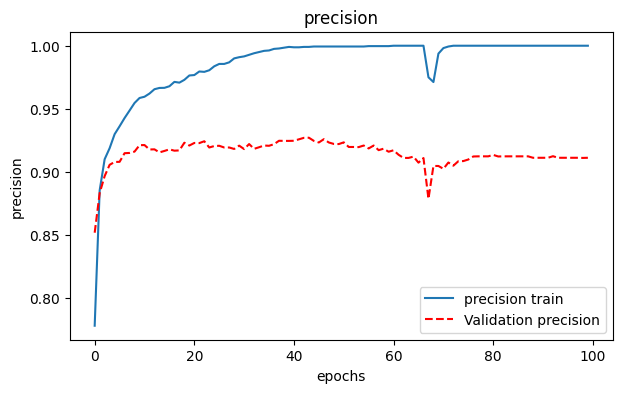

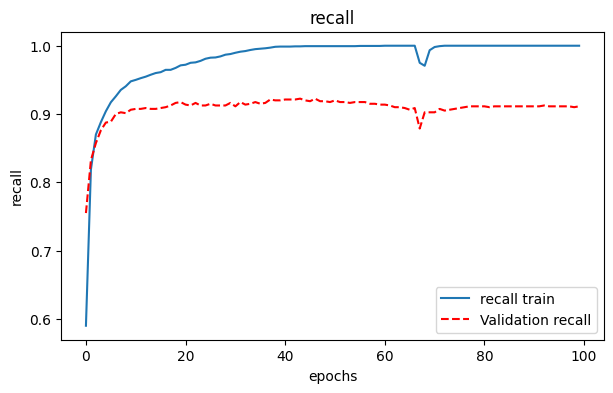

In [8]:
def plot_history(df_history):
    train_metrics = [col for col in df_history.columns if not col.startswith('val_')]
    for metric in train_metrics:
        plt.figure(figsize=(7, 4))
        plt.plot(df_history[metric], label=(f'{metric} train'))
        
        val_metric = f'val_{metric}'
        if val_metric in df_history.columns:
            plt.plot(df_history[val_metric], label=f'Validation {metric}', linestyle='dashed', color='red')

        plt.title(metric)
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        plt.show()            

plot_history(df_history) 

* Disminución inicial de ambas pérdidas (loss, val_loss):





In [9]:
test_loss_bce, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(X_test, y_test_encoded)
print('test_loss_bce', test_loss_bce)
print('test_accuracy', test_accuracy)
print('test_precision', test_precision)
print('test_recall', test_recall)
print('test_auc', test_auc)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9264 - auc: 0.9767 - loss: 0.4280 - precision: 0.9262 - recall: 0.9239   
test_loss_bce 0.5063223838806152
test_accuracy 0.9240000247955322
test_precision 0.923923909664154
test_recall 0.9229999780654907
test_auc 0.9740415215492249


In [10]:
model.predict(X_test) # matriz de probabilidades [n_samples, n_classes]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[2.57404786e-09, 6.89274958e-14, 1.00000000e+00],
       [9.99955654e-01, 7.83518417e-10, 4.43451354e-05],
       [2.56413594e-04, 2.28080724e-04, 9.99515533e-01],
       ...,
       [2.76999277e-15, 1.39045488e-17, 1.00000000e+00],
       [2.13559872e-07, 9.99999762e-01, 1.82166747e-11],
       [4.41638380e-03, 9.95583594e-01, 1.15776495e-14]], dtype=float32)

In [11]:
# guardamos la prediccion
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1) # devuelve la clase que tiene la probabilidad más alta: 0, 1, 2...

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step


In [12]:
df_comparison = pd.DataFrame({'real': y_test, 'prediccion': y_pred_labels})
df_comparison

,real,prediccion
480,2,2
2575,0,0
4452,2,2
550,0,0
4351,1,1
...,...,...
2938,0,0
4522,0,0
2468,2,2
3093,0,1
